# Analysis of Recent Weather Conditions in Almaty
## Group Members: Mansurkhan Aknur, Zhurymbay Akbike, Iliyas Aruzhan 
## 1-Step: Web scrapping 

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

In [3]:
url = "https://www.worldweatheronline.com/almaty-weather/almaty-city/kz.aspx?day=20&tp=1"

In [4]:
response = requests.get(url)

In [5]:
if response.status_code != 200:
    print(f"Failed to retrieve data: {response.status_code}")
else:
    soup = BeautifulSoup(response.content, 'html.parser')
    all_weather_data = []
    day_boxes = soup.find_all('div', class_='box report')

    for day_box in day_boxes:
        date_element = day_box.find('div', class_='days-collapse-date')
        date = date_element.text.strip() if date_element else 'N/A'
        rows = day_box.find_all('tr', class_='days-details-row')[1:]  

        for row in rows:
            time_element = row.find('p', class_='days-comment')
            time = time_element.text.strip() if time_element else 'N/A'
            
            temp_element = row.find('p', class_='days-temp')
            temperature = temp_element.text.strip() if temp_element else 'N/A'

            feels_like_element = row.find('p', class_='days-table-forecast-p')
            feels_like = feels_like_element.text.strip() if feels_like_element else 'N/A'

            rain_element = row.find('div', class_='days-rain-number')
            rain_mm = rain_element.text.strip().replace('\n', '') if rain_element else '0.0'

            rain_percentage_element = row.find_all('td')[4]
            rain_percent = rain_percentage_element.text.strip() if rain_percentage_element else '0%'

            cloud_percentage_element = row.find_all('td')[5]
            cloud_percent = cloud_percentage_element.text.strip() if cloud_percentage_element else '0%'

            pressure_element = row.find_all('td')[6]
            pressure_mb = pressure_element.text.strip().replace('\n', '') if pressure_element else 'N/A'

            wind_element = row.find_all('td')[7]
            wind_kmh = wind_element.text.strip() if wind_element else 'N/A'

            gust_element = row.find_all('td')[8]
            gust_kmh = gust_element.text.strip() if gust_element else 'N/A'

            all_weather_data.append({
                'Date': date,
                'Time': time,
                'Temperature': temperature,
                'Feels Like': feels_like,
                'Rain (mm)': rain_mm,
                'Rain %': rain_percent,
                'Cloud %': cloud_percent,
                'Pressure (mb)': pressure_mb,
                'Wind (km/h)': wind_kmh,
                'Gust (km/h)': gust_kmh
            })

    weather_data = pd.DataFrame(all_weather_data)

    file_path = 'weather_info.csv'
    weather_data.to_csv(file_path, mode='w', header=True, index=False)

    print("Weather data from December 12 to December 26 has been scraped and appended to weather_info.csv")

Weather data from December 12 to December 26 has been scraped and appended to weather_info.csv


## 2-Step: Data cleaning

In [6]:
import pandas as pd

### Data loading

In [7]:
data = pd.read_csv("weather_info.csv")

In [8]:
data

,Date,Time,Temperature,Feels Like,Rain (mm),Rain %,Cloud %,Pressure (mb),Wind (km/h),Gust (km/h)
0,"Saturday, 14 December 2024",00:00,-1 °c,-5 °c,0.0mm,0%,46%,1022mb,12 km/h,26 km/h
1,"Saturday, 14 December 2024",01:00,-1 °c,-5 °c,0.0mm,0%,18%,1021mb,11 km/h,23 km/h
2,"Saturday, 14 December 2024",02:00,-1 °c,-5 °c,0.0mm,0%,15%,1021mb,12 km/h,24 km/h
3,"Saturday, 14 December 2024",03:00,-1 °c,-5 °c,0.0mm,0%,16%,1020mb,11 km/h,23 km/h
4,"Saturday, 14 December 2024",04:00,-1 °c,-5 °c,0.0mm,0%,11%,1020mb,11 km/h,23 km/h
...,...,...,...,...,...,...,...,...,...,...
355,"Saturday, 28 December 2024",19:00,-1 °c,-4 °c,0.0mm,0%,90%,1027mb,7 km/h,14 km/h
356,"Saturday, 28 December 2024",20:00,-2 °c,-5 °c,0.0mm,0%,95%,1028mb,8 km/h,15 km/h
357,"Saturday, 28 December 2024",21:00,-3 °c,-6 °c,0.0mm,0%,100%,1028mb,8 km/h,17 km/h
358,"Saturday, 28 December 2024",22:00,-2 °c,-5 °c,0.0mm,0%,100%,1028mb,7 km/h,15 km/h


In [9]:
data.head()

,Date,Time,Temperature,Feels Like,Rain (mm),Rain %,Cloud %,Pressure (mb),Wind (km/h),Gust (km/h)
0,"Saturday, 14 December 2024",00:00,-1 °c,-5 °c,0.0mm,0%,46%,1022mb,12 km/h,26 km/h
1,"Saturday, 14 December 2024",01:00,-1 °c,-5 °c,0.0mm,0%,18%,1021mb,11 km/h,23 km/h
2,"Saturday, 14 December 2024",02:00,-1 °c,-5 °c,0.0mm,0%,15%,1021mb,12 km/h,24 km/h
3,"Saturday, 14 December 2024",03:00,-1 °c,-5 °c,0.0mm,0%,16%,1020mb,11 km/h,23 km/h
4,"Saturday, 14 December 2024",04:00,-1 °c,-5 °c,0.0mm,0%,11%,1020mb,11 km/h,23 km/h


In [10]:
data.tail()

,Date,Time,Temperature,Feels Like,Rain (mm),Rain %,Cloud %,Pressure (mb),Wind (km/h),Gust (km/h)
355,"Saturday, 28 December 2024",19:00,-1 °c,-4 °c,0.0mm,0%,90%,1027mb,7 km/h,14 km/h
356,"Saturday, 28 December 2024",20:00,-2 °c,-5 °c,0.0mm,0%,95%,1028mb,8 km/h,15 km/h
357,"Saturday, 28 December 2024",21:00,-3 °c,-6 °c,0.0mm,0%,100%,1028mb,8 km/h,17 km/h
358,"Saturday, 28 December 2024",22:00,-2 °c,-5 °c,0.0mm,0%,100%,1028mb,7 km/h,15 km/h
359,"Saturday, 28 December 2024",23:00,-2 °c,-4 °c,0.0mm,0%,100%,1027mb,6 km/h,14 km/h


In [11]:
data[85:95]

,Date,Time,Temperature,Feels Like,Rain (mm),Rain %,Cloud %,Pressure (mb),Wind (km/h),Gust (km/h)
85,"Tuesday, 17 December 2024",13:00,-5 °c,-8 °c,0.0mm,0%,13%,1031mb,6 km/h,7 km/h
86,"Tuesday, 17 December 2024",14:00,-5 °c,-8 °c,0.0mm,0%,20%,1030mb,6 km/h,7 km/h
87,"Tuesday, 17 December 2024",15:00,-5 °c,-7 °c,0.0mm,0%,25%,1029mb,5 km/h,6 km/h
88,"Tuesday, 17 December 2024",16:00,-5 °c,-6 °c,0.0mm,0%,37%,1029mb,4 km/h,5 km/h
89,"Tuesday, 17 December 2024",17:00,-7 °c,-7 °c,0.0mm,0%,37%,1029mb,2 km/h,4 km/h
90,"Tuesday, 17 December 2024",18:00,-7 °c,-9 °c,0.0mm,0%,55%,1030mb,5 km/h,9 km/h
91,"Tuesday, 17 December 2024",19:00,-7 °c,-9 °c,0.0mm,0%,51%,1030mb,5 km/h,9 km/h
92,"Tuesday, 17 December 2024",20:00,-7 °c,-10 °c,0.0mm,0%,52%,1031mb,6 km/h,11 km/h
93,"Tuesday, 17 December 2024",21:00,-6 °c,-9 °c,0.0mm,0%,48%,1030mb,6 km/h,11 km/h
94,"Tuesday, 17 December 2024",22:00,-6 °c,-9 °c,0.0mm,0%,54%,1030mb,6 km/h,11 km/h


### Inspecting the Data

In [12]:
data.isnull().sum()

Date             0
Time             0
Temperature      0
Feels Like       0
Rain (mm)        0
Rain %           0
Cloud %          0
Pressure (mb)    0
Wind (km/h)      0
Gust (km/h)      0
dtype: int64

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           360 non-null    object
 1   Time           360 non-null    object
 2   Temperature    360 non-null    object
 3   Feels Like     360 non-null    object
 4   Rain (mm)      360 non-null    object
 5   Rain %         360 non-null    object
 6   Cloud %        360 non-null    object
 7   Pressure (mb)  360 non-null    object
 8   Wind (km/h)    360 non-null    object
 9   Gust (km/h)    360 non-null    object
dtypes: object(10)
memory usage: 28.3+ KB


In [15]:
data.describe()

,Date,Time,Temperature,Feels Like,Rain (mm),Rain %,Cloud %,Pressure (mb),Wind (km/h),Gust (km/h)
count,360,360,360,360,360,360,360,360,360,360
unique,15,24,20,25,15,6,89,36,15,26
top,"Saturday, 14 December 2024",00:00,-10 °c,-12 °c,0.0mm,0%,0%,1027mb,10 km/h,9 km/h
freq,24,15,42,31,308,304,85,29,52,27


### Data processing (converting object type--> numeric type)

### Changing the types and adding new column

In [16]:
if 'Date' in data.columns and 'Time' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.time
    data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Time'].astype(str), errors='coerce')
    data['Hour'] = data['Timestamp'].dt.hour

data = data.dropna(subset=['Timestamp'])

### Changing numeric columns to the float type 

In [17]:
numeric_columns = ['Temperature', 'Feels Like', 'Rain (mm)', 'Rain %', 'Cloud %', 'Pressure (mb)', 'Wind (km/h)', 'Gust (km/h)']

for col in numeric_columns:
    data[col] = data[col].astype(str).str.replace(r'[^\d.-]', '', regex=True).astype(float)

for col in numeric_columns:
    data[col] = data[col].fillna(data[col].mean())

if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data = data.dropna(subset=['Date'])
data = data.drop_duplicates()

### Filling missing values if there any (But in our data there are no missing values)

In [18]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna('Unknown')

data.to_csv('weather_info.csv', index=False)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           360 non-null    datetime64[ns]
 1   Time           360 non-null    object        
 2   Temperature    360 non-null    float64       
 3   Feels Like     360 non-null    float64       
 4   Rain (mm)      360 non-null    float64       
 5   Rain %         360 non-null    float64       
 6   Cloud %        360 non-null    float64       
 7   Pressure (mb)  360 non-null    float64       
 8   Wind (km/h)    360 non-null    float64       
 9   Gust (km/h)    360 non-null    float64       
 10  Timestamp      360 non-null    datetime64[ns]
 11  Hour           360 non-null    int32         
dtypes: datetime64[ns](2), float64(8), int32(1), object(1)
memory usage: 32.5+ KB


### 3-Step: Data augmentation 

In [20]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_csv("weather_info.csv")

### First augmentation ( Calculating Temp Range)

In [22]:
data['Temp Range'] = data['Temperature'] - data['Feels Like']

### Second augmentation (Calculating Wind Chill)

In [23]:

data['Wind Chill'] = (
    13.12 + 0.6215 * data['Temperature'] 
    - 11.37 * (data['Wind (km/h)'] ** 0.16) 
    + 0.3965 * data['Temperature'] * (data['Wind (km/h)'] ** 0.16)
).round(2)

data.to_csv("weather_info.csv", index=False)


### Third augmentation (Adding new columns)

In [24]:
data.fillna(data.mean(numeric_only=True), inplace=True)

# Create additional features (e.g., month, day, or other derived columns)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data['Year']=data['Date'].dt.year
data.to_csv("weather_info.csv", index=False)

### Fourth augmentation

In [25]:
# Heat Index (approximation for temperatures > 27°C)
data['Heat Index'] = np.where(
    data['Temperature'] > 27,
    (
        -8.784695 + 
        1.61139411 * data['Temperature'] +
        2.338549 * data['Rain %'] - 
        0.14611605 * data['Temperature'] * data['Rain %']
    ).round(2),
    data['Temperature']
)
data.to_csv("weather_info.csv", index=False)

### Fifth augmentation

In [26]:
# Rain Intensity
data['Rain Intensity'] = (data['Rain %'] * data['Rain (mm)'] / 100).round(2)
data.to_csv("weather_info.csv", index=False)

### Sixth augmentation

In [27]:
# Wind Gust Difference
data['Wind Gust Difference'] = (data['Gust (km/h)'] - data['Wind (km/h)']).round(2)
data.to_csv("weather_info.csv", index=False)

### 4-Step: Data visualization

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Distribution of Temperature

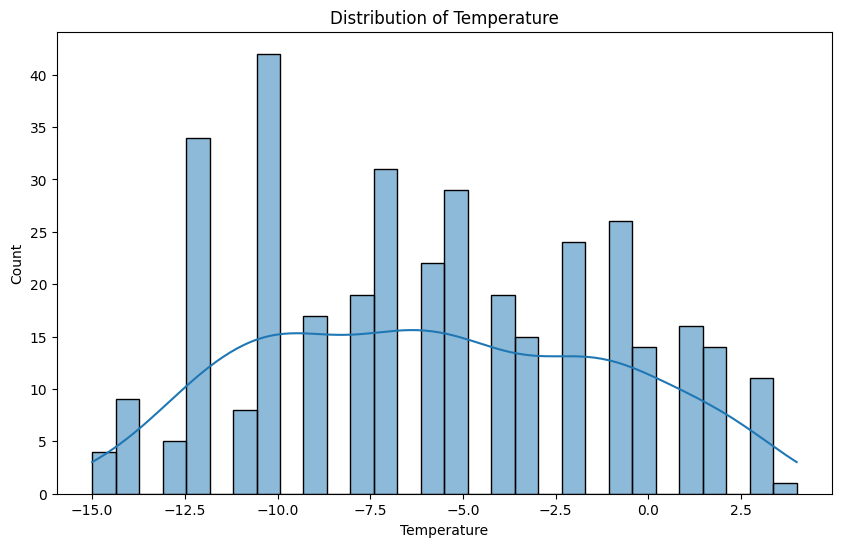

In [29]:
if 'Temperature' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Temperature'], kde=True, bins=30)
    plt.title("Distribution of Temperature")
    plt.show()

### 2.Cloud Coverage Over Time

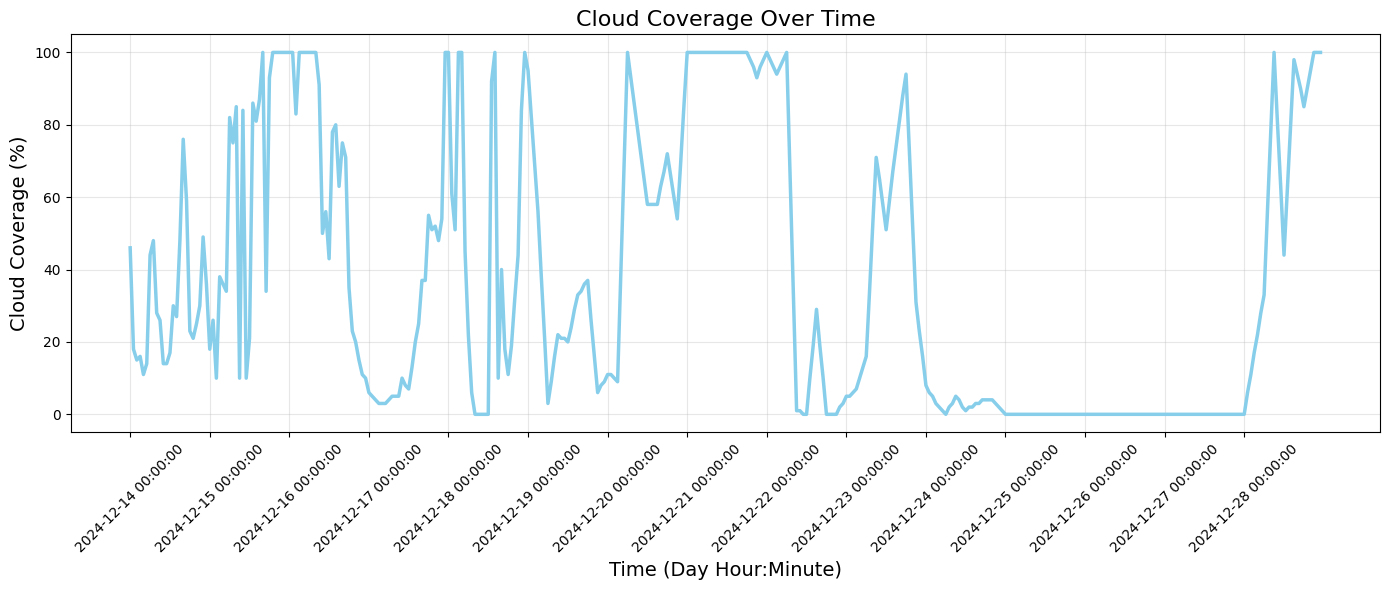

In [30]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Timestamp', y='Cloud %', data=data, color='skyblue', linewidth=2.5)
plt.title('Cloud Coverage Over Time', fontsize=16)
plt.xlabel('Time (Day Hour:Minute)', fontsize=14)
plt.ylabel('Cloud Coverage (%)', fontsize=14)
plt.xticks(data['Timestamp'][::24], rotation=45)  #showing every 24th value for clarity
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 3.Pressure Trends by Date

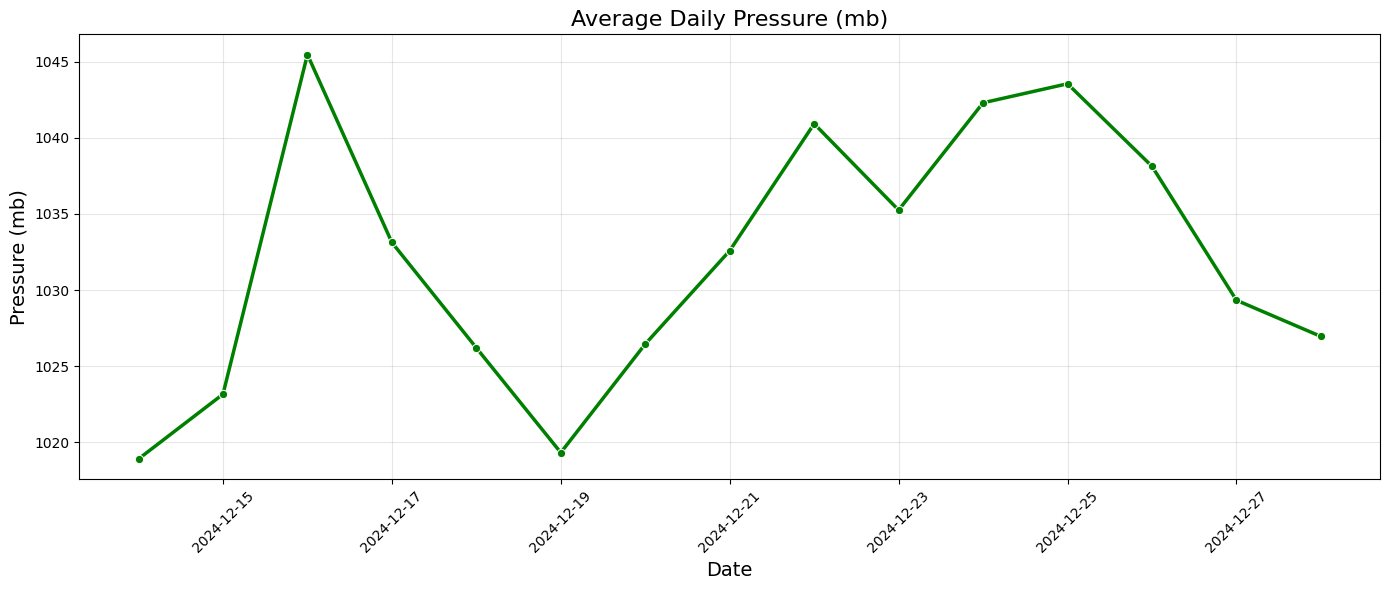

In [31]:
plt.figure(figsize=(14, 6))
daily_pressure = data.groupby('Date')['Pressure (mb)'].mean().reset_index()

sns.lineplot(x='Date', y='Pressure (mb)', data=daily_pressure, color='green', marker='o', linewidth=2.5)
plt.title('Average Daily Pressure (mb)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Pressure (mb)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 4.Average Wind Speed and Gust by Time of Day

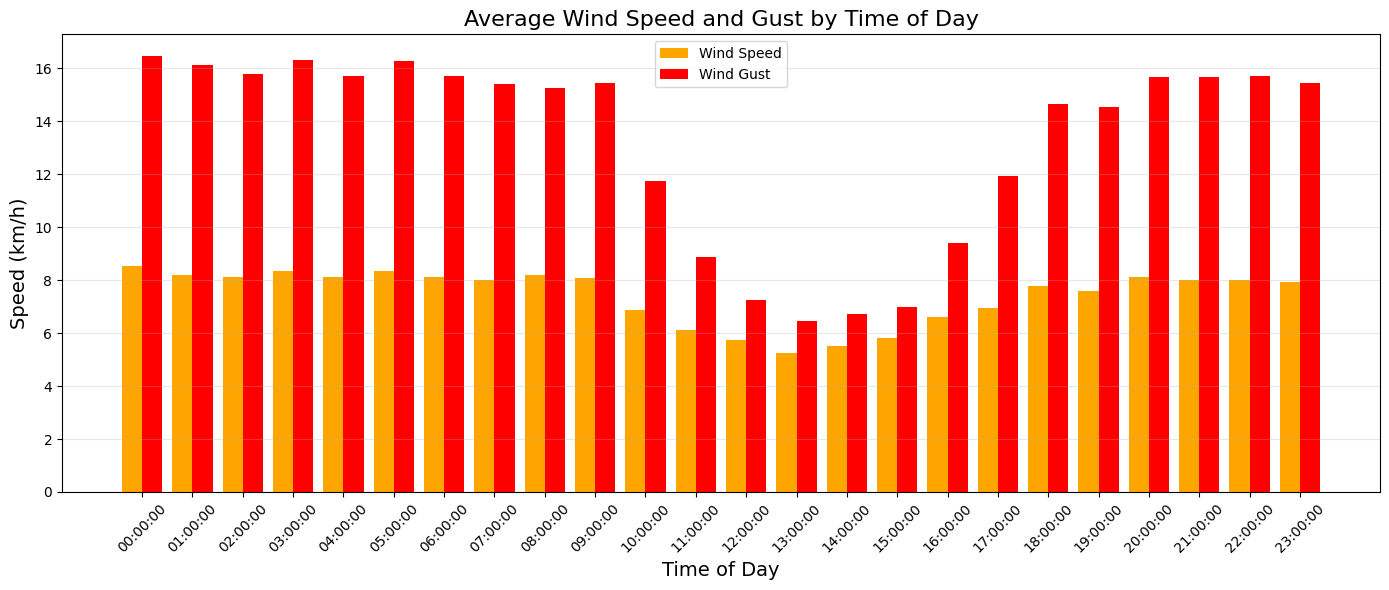

In [33]:
plt.figure(figsize=(14, 6))
time_wind = data.groupby('Time')[['Wind (km/h)', 'Gust (km/h)']].mean().reset_index()

#bar plot
bar_width = 0.4
time_indices = range(len(time_wind['Time']))

#Plot Wind Speed
plt.bar(time_indices, time_wind['Wind (km/h)'], color='orange', width=bar_width, label='Wind Speed')

#Plot Wind Gusts (shifted slightly for visibility)
plt.bar(
    [x + bar_width for x in time_indices],
    time_wind['Gust (km/h)'],
    color='red',
    width=bar_width,
    label='Wind Gust'
)

#Adding labels and titles
plt.title('Average Wind Speed and Gust by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Speed (km/h)', fontsize=14)
plt.xticks([x + bar_width / 2 for x in time_indices], time_wind['Time'], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### 5.Heatmap of Weather Features

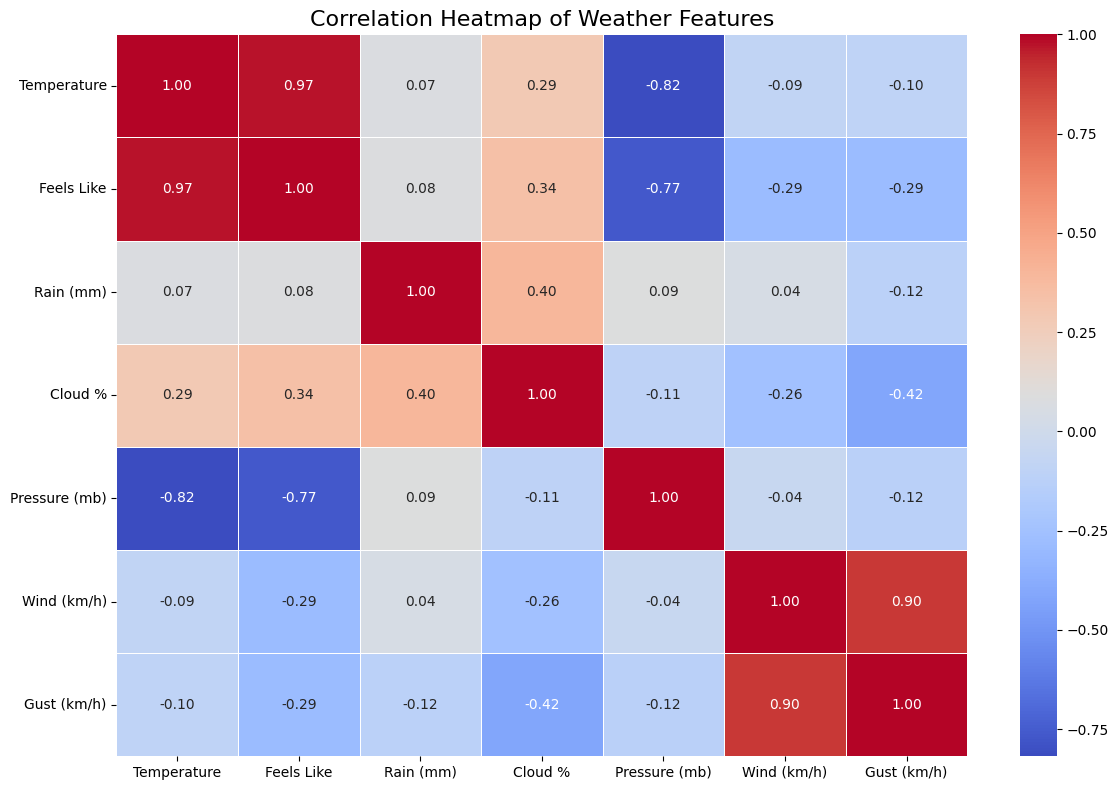

In [34]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[['Temperature', 'Feels Like', 'Rain (mm)', 'Cloud %', 
                                   'Pressure (mb)', 'Wind (km/h)', 'Gust (km/h)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Features', fontsize=16)
plt.tight_layout()
plt.show()

### 5-Step: Building supervised machine learning and training

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 1.Separating the data into features (X) and target (y)

In [36]:
X=data[['Feels Like', 'Rain (mm)', 'Rain %', 'Cloud %', 'Pressure (mb)', 'Wind (km/h)', 'Gust (km/h)', 'Hour']]
y=data['Temperature']

### 2.Splitting the data into training set and testing set

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

### 3.Building the model with the training data

In [38]:
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 4.Prediction using the test data and metrics calculation

In [39]:
y_pred=model.predict(X_test)

mae=mean_absolute_error(y_test, y_pred)

mse=mean_squared_error(y_test, y_pred)

rmse=np.sqrt(mse)

r2score=r2_score(y_test, y_pred)

print(y_pred)
print(f"Mean absolute error: {mae:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"R^2: {r2score:.2f}")

[-12.13   0.09  -9.67  -3.31  -7.1  -12.     1.89  -8.18 -14.37  -3.15
  -8.15  -1.07 -12.01  -7.03  -1.1   -2.91 -10.01  -4.89  -1.02  -1.76
  -1.02 -11.85  -2.09   0.87 -10.   -12.16  -2.53  -0.85   2.74  -9.87
 -12.    -0.6   -1.7   -2.29  -1.19   2.23   2.34   1.31  -5.68  -6.46
  -4.4    1.92  -5.64   0.02  -1.22  -9.94  -6.86  -0.33  -5.11  -6.96
  -9.67 -14.03 -10.13 -10.06  -6.66 -10.19  -1.    -1.78 -10.16  -9.93
  -6.38  -5.82 -11.9   -9.71  -9.56  -5.99  -1.9  -11.72  -6.71  -5.66
 -10.39 -11.21]
Mean absolute error: 0.30
Mean squared error: 0.18
Root mean squared error: 0.42
R^2: 0.99


### 5.Predicting future forecasts for upcoming dates

In [40]:
pred_data=data[['Feels Like', 'Rain (mm)', 'Rain %', 'Cloud %', 'Pressure (mb)', 'Wind (km/h)', 'Gust (km/h)', 'Hour']].iloc[-15:]
ml_predictions=model.predict(pred_data)
prognosis=pd.DataFrame({
    'Date': pd.date_range(start='2024-12-27', periods=15, freq='D'), 
    'Temp Forecast': ml_predictions
})

print(prognosis)

         Date  Temp Forecast
0  2024-12-27          -5.05
1  2024-12-28          -3.62
2  2024-12-29          -1.70
3  2024-12-30          -0.03
4  2024-12-31           0.20
5  2025-01-01           0.89
6  2025-01-02           1.31
7  2025-01-03           0.82
8  2025-01-04          -0.23
9  2025-01-05          -1.07
10 2025-01-06          -1.26
11 2025-01-07          -1.76
12 2025-01-08          -2.90
13 2025-01-09          -1.90
14 2025-01-10          -1.69


### 6.Visualizing the predicted temperature forecast

In [41]:
import matplotlib.pyplot as plt

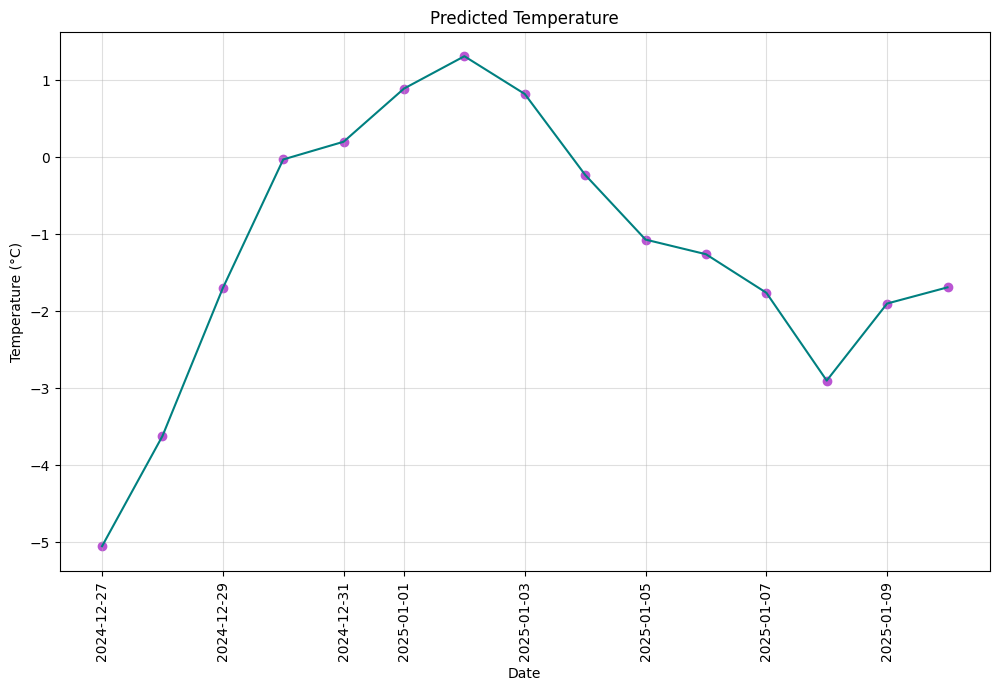

In [42]:
plt.figure(figsize=(12,7))
plt.plot(prognosis['Date'], prognosis['Temp Forecast'], color='teal', label='Line')
plt.scatter(prognosis['Date'], prognosis['Temp Forecast'], color='mediumorchid', label='Forecast Points')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Predicted Temperature')
plt.xticks(rotation=90)
plt.grid(True, linestyle='solid', alpha=0.4)
plt.show()